In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Define dependent and independent variables.
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [4]:
# Convert the dataset into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [5]:
# Find the value of k using SQRT method.
k = int(np.sqrt(X_train.shape[0]))
k

24

In [6]:
# Create KNN Classification Model and predict the output.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Confusion matrix : 
 [[97 10]
 [22 25]]


<AxesSubplot:>

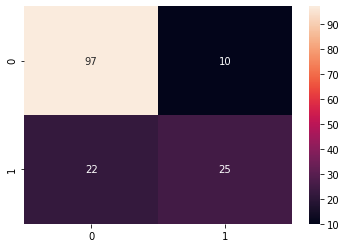

In [7]:
# Analyze the output using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix : \n", cm)
sns.heatmap(cm, annot=True)

In [8]:
# Find the accuracy score.
accuracy = knn.score(X_test, y_test)*100
print("Accuracy Score : ", accuracy)

Accuracy Score :  79.22077922077922


In [9]:
# Predict the output for any one new input
new_input = [[1,85,66,29,0,26.6,0.351,31]]
new_input_pred = knn.predict(new_input)
new_input_pred = list(map(lambda x: "Patient has diabetes" if x  else "Patient has not diabetes", new_input_pred))
print("Predicted Output : ", new_input_pred[0])

Predicted Output :  Patient has not diabetes


In [10]:
# Predict the output for any one new input
new_input = [[6,148,72,35,0,33.6,0.627,50]]
new_input_pred = knn.predict(new_input)
new_input_pred = list(map(lambda x: "Patient has diabetes" if x  else "Patient has not diabetes", new_input_pred))
print("Predicted Output : ", new_input_pred[0])

Predicted Output :  Patient has diabetes
